In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from lr_utils import load_dataset

## 2 - Overview of the Problem set ##

**Problem Statement**: You are given a dataset ("data.h5") containing:
    - a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
    - a test set of m_test images labeled as cat or non-cat
    - each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.


In [2]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

### Example of a Picture

y = [1], it's a 'cat' picture.


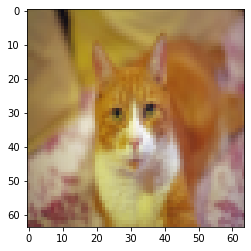

In [3]:
# Example of a picture
index = 24
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

#### Finding Shapes Of training and testing sets

In [10]:
print('Training_Set_Shape_X :',train_set_x_orig.shape)
print('Testing_Set_Shape_X  :',test_set_x_orig.shape)
print('Classes              :',classes)

Training_Set_Shape_X : (209, 64, 64, 3)
Testing_Set_Shape_X  : (50, 64, 64, 3)
Classes              : [b'non-cat' b'cat']


Find the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

In [11]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print('Training_Size    :',m_train)
print('Testing_Size     :',m_test)
print('Pixel_Dimensions :',num_px,'x',num_px,'x 3')

Training_Size    : 209
Testing_Size     : 50
Pixel_Dimensions : 64 x 64 x 3


#### Reshaping Training and Testing Sets as we Need

In [12]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

In [14]:
print('train_x_shape   :',train_set_x_flatten.shape)
print('train_y_shape   :',train_set_y.shape)
print('test_x_shape    :',test_set_x_flatten.shape)
print('test_y_shape    :',test_set_y.shape)

train_x_shape   : (12288, 209)
train_y_shape   : (1, 209)
test_x_shape    : (12288, 50)
test_y_shape    : (1, 50)


To represent color images, the red, green and blue channels (RGB) must be specified for each pixel, and so the pixel value is actually a vector of three numbers ranging from 0 to 255.

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

<!-- During the training of your model, you're going to multiply weights and add biases to some initial inputs in order to observe neuron activations. Then you backpropogate with the gradients to train the model. But, it is extremely important for each feature to have a similar range such that our gradients don't explode. You will see that more in detail later in the lectures. !--> 

Let's standardize our dataset.

In [15]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

#### Activation Function

In [16]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

##### Initialize Parameters

In [41]:
Wi = np.zeros((train_set_x_flatten.shape[0],1))
bi = 0

##### Logistic Regression Model

In [52]:
def Gradient_Descent(X,Y,W,b,learning_rate,iterations):
    m = X.shape[1]
    for i in range(iterations):
        Z = np.dot(W.T,X)
        A = sigmoid(Z)
        Y.reshape(1,m)
        dZ = A-Y
        dW = (1/m)*(np.dot(X,dZ.T))
        db = np.sum(dZ)
        W = W - learning_rate*(dW)
        b = b - learning_rate*(db)
    return W,b

In [53]:
import time

#### prediction

In [66]:
tic = time.time()
W_final,b_final = Gradient_Descent(train_set_x,train_set_y,Wi,bi,0.1,2000)
toc = time.time()
print('Training_time : ',toc-tic,'seconds')

Training_time :  4.84261679649353 seconds


In [67]:
Y_prediction = sigmoid(np.dot(W_final.T,test_set_x)+b_final)
print(Y_prediction)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 2.61979608e-02 1.00000000e+00
  1.00000000e+00 1.00000000e+00 9.99999766e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.10504734e-07 1.00000000e+00
  4.40405049e-01 1.00000000e+00 9.99999920e-01 5.33806380e-01
  1.00000000e+00 6.65485145e-01 2.84827378e-03 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.67258808e-05
  1.75302006e-04 1.00000000e+00 9.99940155e-01 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 7.82064143e-01
  9.95855218e-01 1.00000000e+00 9.99999362e-01 9.99841362e-01
  1.00000000e+00 9.99999721e-01 1.00000000e+00 9.83344236e-01
  1.00000000e+00 1.00000000e+00 9.99999794e-01 1.00000000e+00
  1.00000000e+00 9.99031077e-01]]


#### Rounding off

In [68]:
for i in range(50):
    if(Y_prediction[0][i]>0.5):
        Y_prediction[0][i]=1
    else:
        Y_prediction[0][i]=0
print(Y_prediction)

[[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
  1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1.]]


In [69]:
print(test_set_y)

[[1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0
  0 1 0 0 1 1 1 0 0 0 1 1 1 0]]


#### Accuracy??

In [70]:
c = 0
for i in range(50):
    if(test_set_y[0][i]==Y_prediction[0][i]):
        c+=1
print('Accuracy : ',(c/m_test)*100,'%')

Accuracy :  70.0 %


#### Showing a Prediction

Enter a no. from 1-50 :2
It is a  b'cat'


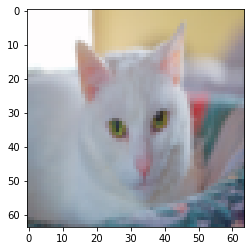

In [72]:
index = int(input('Enter a no. from 1-50 :'))
plt.imshow(test_set_x_orig[index])
print('It is a ',classes[int(Y_prediction[0][index])])